# Tratamento do datasets

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
db_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
db_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
db_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
db_deaths_country = db_deaths.groupby(['Country/Region']).sum()
db_confirmed_country = db_confirmed.groupby(['Country/Region']).sum()
db_recovered_country = db_recovered.groupby(['Country/Region']).sum()

In [5]:
db_deaths_country.drop(['Lat','Long'],axis=1,inplace=True)
db_confirmed_country.drop(['Lat','Long'],axis=1,inplace=True)
db_recovered_country.drop(['Lat','Long'],axis=1,inplace=True)

In [6]:
db_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,989,998,1004,1029,1050,1076,1099,1122,1137,1143
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,763,763,763,763,764,764,764,765
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,61,69,70,70,71,74,81,84,86,86


# Gráficos

In [9]:
date, days, weeks, n_weeks, n, k = '6/1/20', 30, 5, 18, 6, 5

## Confirmados

In [10]:
maxconfirmed = db_confirmed_country[date].sort_values(ascending=False)[:n]

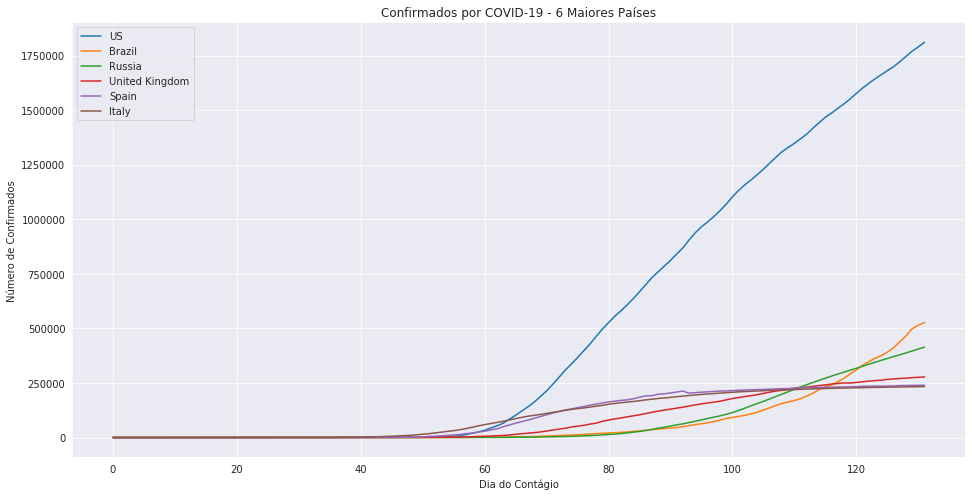

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmed.index:
  ax.plot(range(db_confirmed_country.T.shape[0]), db_confirmed_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Confirmados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
#plt.savefig('confirmedcovid.png')

In [12]:
percconfirmed = pd.DataFrame(np.zeros((db_confirmed_country.shape[1],db_confirmed_country.shape[0])), index = db_confirmed_country.columns, columns=db_confirmed_country.index)

In [13]:
for i in db_confirmed_country.T.columns:
  for j in range(db_confirmed_country.T.shape[0]-1):
    if db_confirmed_country.T[i][j] != 0:
      percconfirmed[i][j+1] = ((db_confirmed_country.T[i][j+1]- db_confirmed_country.T[i][j])/db_confirmed_country.T[i][j])

In [19]:
a = pd.DataFrame(percconfirmed.T[date].sort_values(ascending = True)).T
ixmaxconf = a[maxconfirmed.index].columns

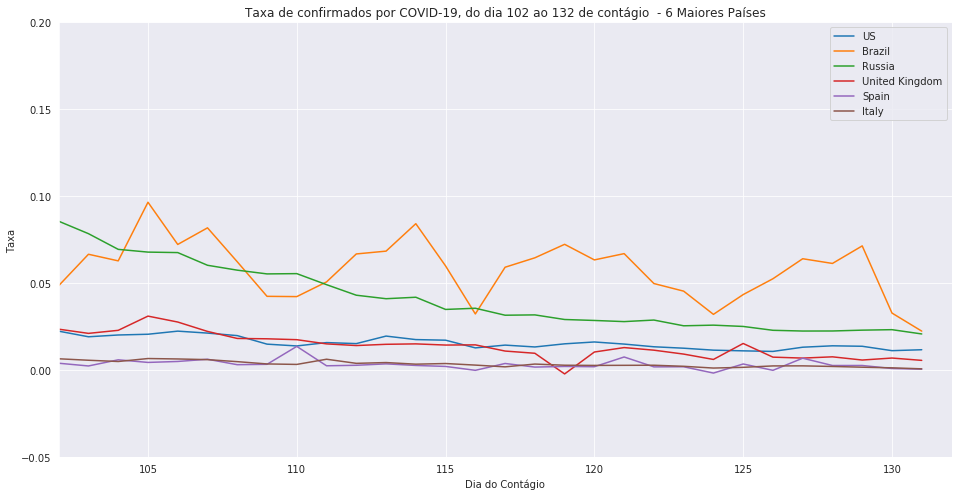

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxconf:
  ax.plot(range(percconfirmed.shape[0]), percconfirmed[i],label=i)
  ax.set_xlim(db_confirmed_country.shape[1] - days,db_confirmed_country.shape[1])
  ax.set_ylim(-0.05,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de confirmados por COVID-19, do dia {} ao {} de contágio  - {} Maiores Países'.format(db_confirmed_country.shape[1] - days,db_confirmed_country.shape[1],n))
plt.legend()

In [34]:
idmeanconfirmed = pd.DataFrame(np.zeros((n_weeks,db_confirmed_country.T.shape[1])), index = range(n_weeks), columns=db_confirmed_country.index)
a = 0
for i in db_confirmed_country.T.columns:
    for j in range(n_weeks):
        idmeanconfirmed[i][j] = (percconfirmed[i][a:(a+7)].mean())
        a = a + 7
    a = 0

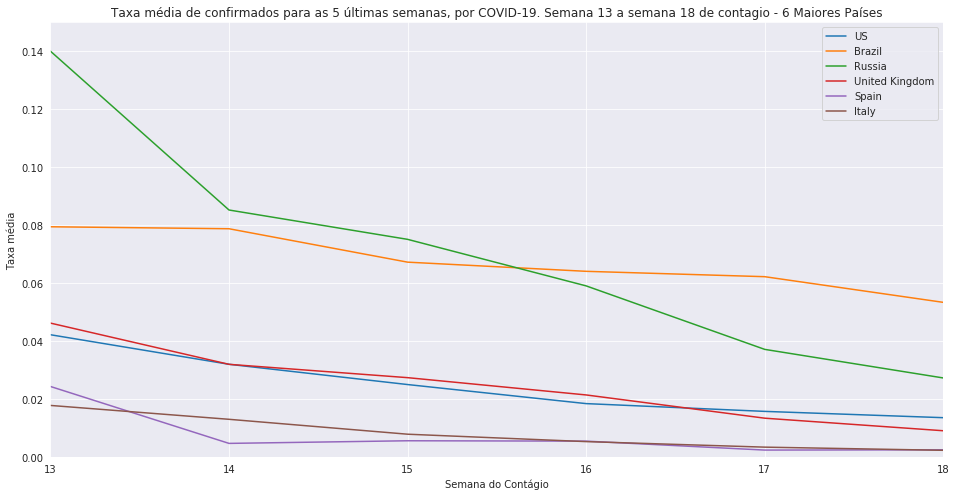

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxconfirmed.index:
  ax.plot(range(1,idmeanconfirmed.shape[0]+1), idmeanconfirmed[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de confirmados para as {} últimas semanas, por COVID-19. Semana {} a semana {} de contagio - {} Maiores Países'.format(weeks,n_weeks - weeks,n_weeks,n))
plt.legend()
#plt.savefig('revoredcovid.png')

In [23]:
pd.DataFrame(maxconfirmed)

,6/1/20
Country/Region,
US,1811360
Brazil,526447
Russia,414328
United Kingdom,277736
Spain,239638
Italy,233197


## Mortes

In [24]:
maxdeaths = db_deaths_country[date].sort_values(ascending=False)[:n]

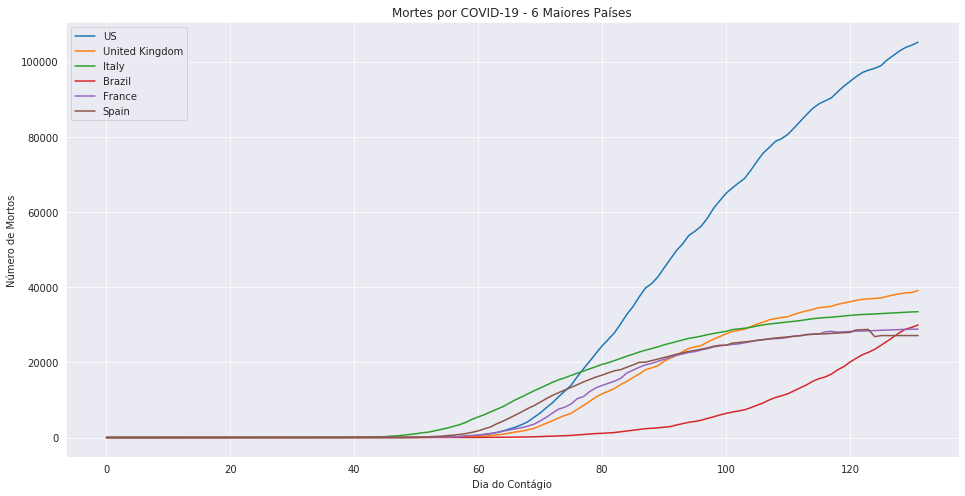

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxdeaths.index:
  ax.plot(range(db_deaths_country.T.shape[0]), db_deaths_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Mortes por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
#plt.savefig('deathscovid.png')

In [37]:
percdeaths = pd.DataFrame(np.zeros(db_deaths_country.T.shape), index = db_deaths_country.columns, columns=db_deaths_country.index)

In [38]:
for i in db_deaths_country.T.columns:
  for j in range(db_deaths_country.T.shape[0]-1):
    if db_deaths_country.T[i][j] != 0:
      percdeaths[i][j+1] = ((db_deaths_country.T[i][j+1]- db_deaths_country.T[i][j])/db_deaths_country.T[i][j])

In [39]:
b = pd.DataFrame(percdeaths.T[date].sort_values(ascending = False)).T
ixmaxdeaths = b[maxdeaths.index].columns
ixmaxdeaths

Index(['US', 'United Kingdom', 'Italy', 'Brazil', 'France', 'Spain'], dtype='object', name='Country/Region')

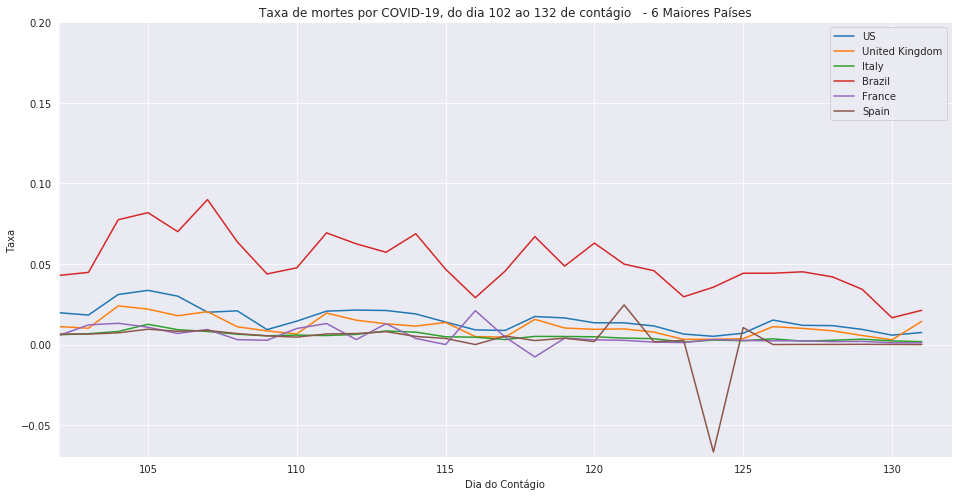

In [41]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxdeaths:
  ax.plot(range(percdeaths.shape[0]), percdeaths[i],label=i)
  ax.set_xlim(db_deaths_country.shape[1] - days,db_deaths_country.shape[1])
  ax.set_ylim(-0.07,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de mortes por COVID-19, do dia {} ao {} de contágio   - {} Maiores Países'.format(db_deaths_country.shape[1]-days,db_deaths_country.shape[1],n))
plt.legend()

In [43]:
idmeandeaths = pd.DataFrame(np.zeros((n_weeks,db_deaths_country.T.shape[1])), index = range(n_weeks), columns=db_deaths_country.index)
a = 0
for i in db_deaths_country.T.columns:
    for j in range(n_weeks):
        idmeandeaths[i][j] = (percdeaths[i][a:(a+7)].mean())
        a = a + 7
    a = 0

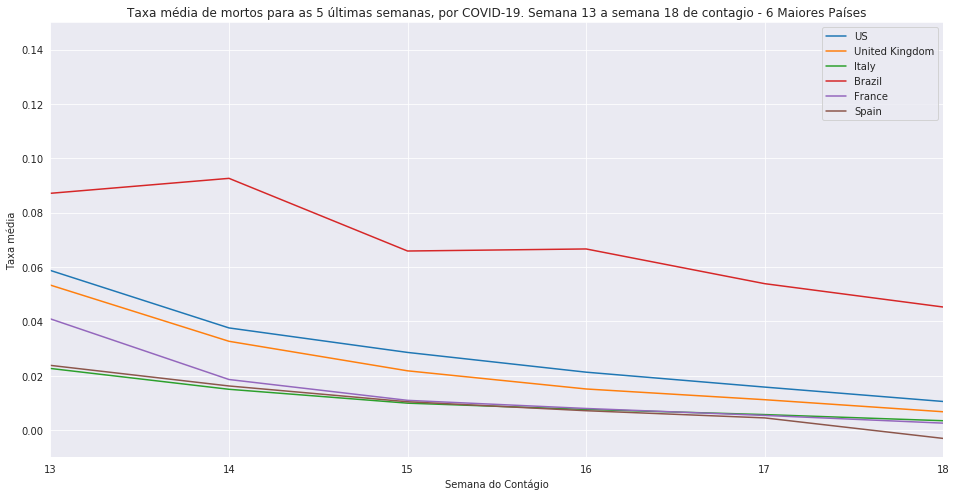

In [44]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxdeaths.index:
  ax.plot(range(1,idmeandeaths.shape[0]+1), idmeandeaths[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(-0.01,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de mortos para as {} últimas semanas, por COVID-19. Semana {} a semana {} de contagio - {} Maiores Países'.format(weeks,n_weeks - weeks, n_weeks,n))
plt.legend()
#plt.savefig('revoredcovid.png')

In [282]:
pd.DataFrame(maxdeaths)

,5/31/20
Country/Region,
US,104381
United Kingdom,38571
Italy,33415
Brazil,29314
France,28805
Spain,27127


## Recuperados

In [45]:
maxrecovered = db_recovered_country[date].sort_values(ascending=False)[:n]

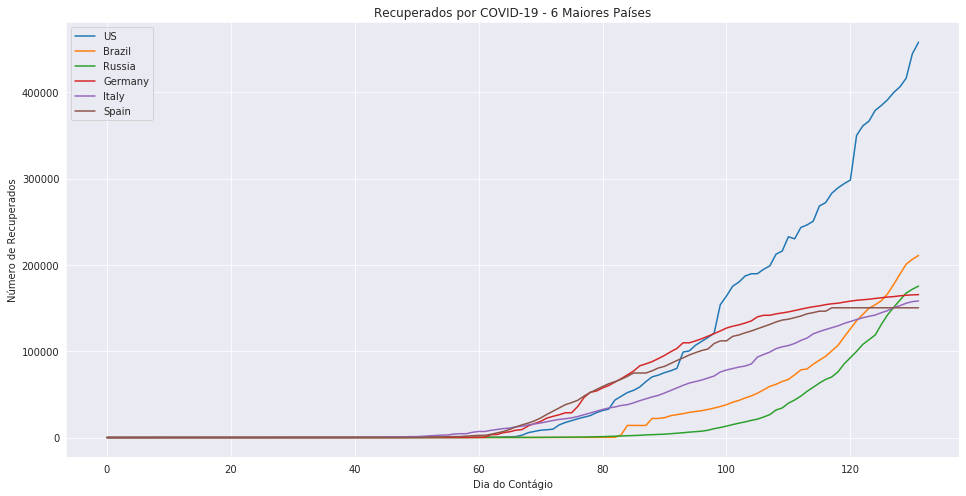

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxrecovered.index:
  ax.plot(range(db_recovered_country.T.shape[0]), db_recovered_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Recuperados')
plt.title('Recuperados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
#plt.savefig('revoredcovid.png')

In [48]:
percrecovered = pd.DataFrame(np.zeros(db_recovered_country.T.shape), index = db_recovered_country.columns, columns=db_recovered_country.index)

In [49]:
for i in db_recovered_country.T.columns:
  for j in range(db_recovered_country.T.shape[0]-1):
    if db_recovered_country.T[i][j] != 0:
      percrecovered[i][j] = ((db_recovered_country.T[i][j+1]- db_recovered_country.T[i][j])/db_recovered_country.T[i][j])

In [50]:
b = pd.DataFrame(percrecovered.T[date].sort_values(ascending = False)).T
ixmaxrecovered = b[maxrecovered.index].columns
ixmaxrecovered

Index(['US', 'Brazil', 'Russia', 'Germany', 'Italy', 'Spain'], dtype='object', name='Country/Region')

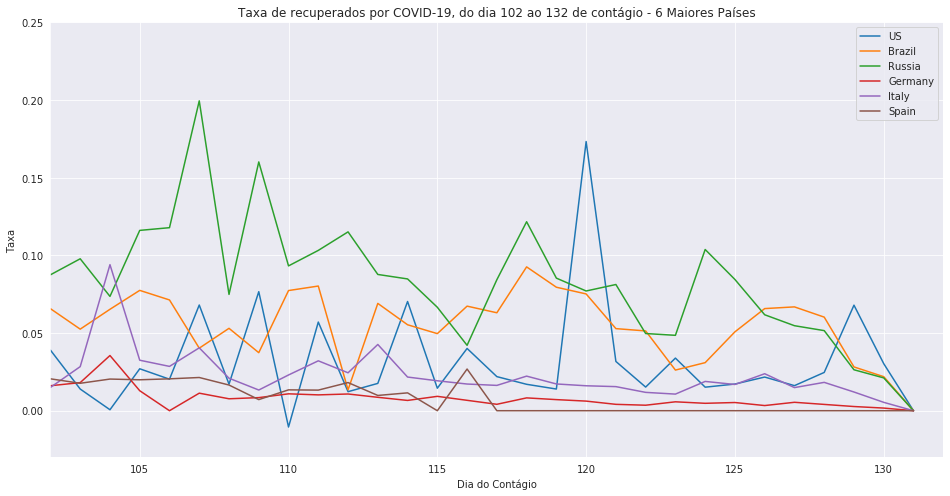

In [54]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxrecovered:
  ax.plot(range(percrecovered.shape[0]), percrecovered[i],label=i)
  ax.set_xlim(percrecovered.shape[0] - days,percrecovered.shape[0])
  ax.set_ylim(-0.03,0.25)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de recuperados por COVID-19, do dia {} ao {} de contágio - {} Maiores Países'.format(db_recovered_country.shape[1] - days,db_recovered_country.shape[1],n))
plt.legend()

In [295]:
pd.DataFrame(maxrecovered)

,5/31/20
Country/Region,
US,444758
Brazil,206555
Russia,171883
Germany,165352
Italy,157507
Spain,150376


In [55]:
idmeanrecovered = pd.DataFrame(np.zeros((n_weeks,db_recovered_country.T.shape[1])), index = range(n_weeks), columns=db_recovered_country.index)
a = 0
for i in db_recovered_country.T.columns:
    for j in range(n_weeks):
        idmeanrecovered[i][j] = (percrecovered[i][a:(a+7)].mean())
        a = a + 7
    a = 0

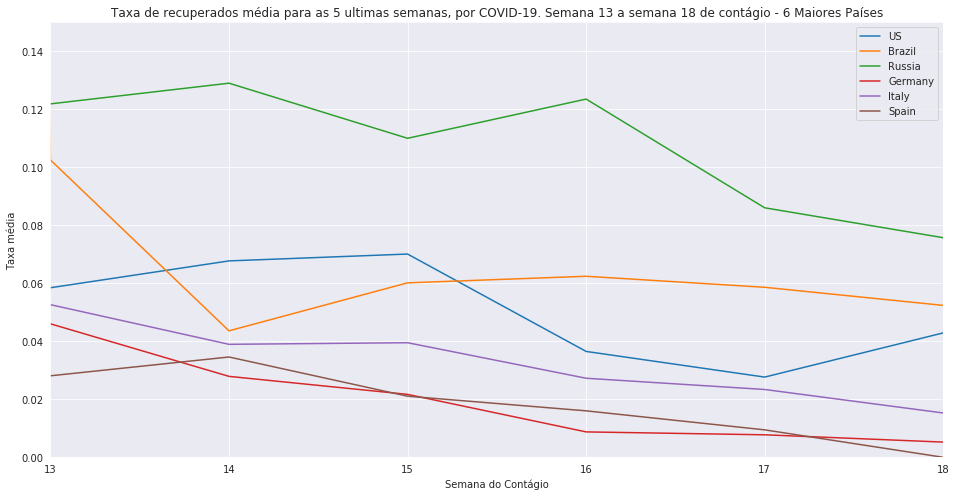

In [56]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxrecovered.index:
  ax.plot(range(1,idmeanrecovered.shape[0]+1), idmeanrecovered[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa de recuperados média para as {} ultimas semanas, por COVID-19. Semana {} a semana {} de contágio - {} Maiores Países'.format(weeks, n_weeks - weeks, n_weeks,n))
plt.legend()
#plt.savefig('revoredcovid.png')

In [57]:
countries = ['Brazil','US','Russia']

situation = ['Confirmed', 'Deaths','Recovered']

idx = pd.MultiIndex.from_product([countries, situation],

                           names=['Countries', 'Situation'])

data = [idmeanconfirmed['Brazil'],
        idmeandeaths['Brazil'],
        idmeanrecovered['Brazil'],
        idmeanconfirmed['US'],
        idmeandeaths['US'],
        idmeanrecovered['US'],
        idmeanconfirmed['Russia'],
        idmeandeaths['Russia'],
        idmeanrecovered['Russia']]

data = pd.DataFrame(data,index = idx)

In [58]:
data.T

Countries    Brazil                            US                      \
Situation Confirmed    Deaths Recovered Confirmed    Deaths Recovered   
0          0.000000  0.000000  0.000000  0.357143  0.000000  0.000000   
1          0.000000  0.000000  0.000000  0.131122  0.000000  0.000000   
2          0.000000  0.000000  0.000000  0.012987  0.000000  0.000000   
3          0.000000  0.000000  0.000000  0.011905  0.000000  0.000000   
4          0.000000  0.000000  0.000000  0.364835  0.000000  0.123810   
5          0.142857  0.000000  0.000000  0.131378  0.738095  0.023810   
6          0.611209  0.000000  0.000000  0.359699  0.228419  0.020408   
7          0.487213  0.000000  0.142857  0.312505  0.252506  0.870448   
8          0.331329  0.796654  0.000000  0.364745  0.338368  0.224045   
9          0.143887  0.235359  3.008333  0.196166  0.269927  0.635838   
10         0.137603  0.194364  0.000000  0.112837  0.171322  0.165298   
11         0.088090  0.122485  2.939124  0.062744  0.093644  0.122851   
12         0.079516  0.087129  0.102558  0.042275  0.058741  0.058485   
13         0.078834  0.092631  0.043625  0.032082  0.037597  0.067744   
14         0.067311  0.065895  0.060177  0.025095  0.028584  0.070104   
15         0.064149  0.066654  0.062442  0.018519  0.021320  0.036517   
16         0.062298  0.053883  0.058641  0.015838  0.015833  0.027667   
17         0.053446  0.045288  0.052398  0.013666  0.010535  0.042910   

Countries    Russia                      
Situation Confirmed    Deaths Recovered  
0          0.000000  0.000000  0.000000  
1          0.000000  0.000000  0.000000  
2          0.000000  0.000000  0.000000  
3          0.000000  0.000000  0.000000  
4          0.000000  0.000000  0.000000  
5          0.071429  0.000000  0.000000  
6          0.438214  0.000000  0.071429  
7          0.297327  0.000000  0.238095  
8          0.235286  0.000000  0.212121  
9          0.248951  0.621032  0.332057  
10         0.181946  0.197829  0.174029  
11         0.159376  0.167226  0.193671  
12         0.140079  0.151547  0.121907  
13         0.085297  0.096296  0.129038  
14         0.075178  0.076674  0.110034  
15         0.059125  0.055386  0.123563  
16         0.037229  0.042791  0.086057  
17         0.027369  0.042934  0.075743

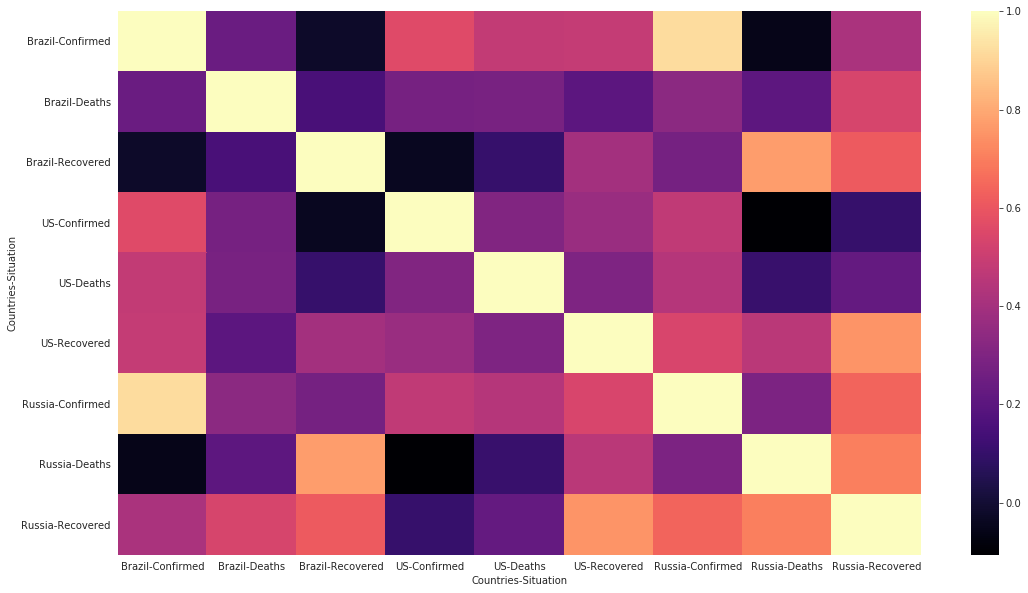

In [59]:
plt.figure(figsize=(18,10))
sns.heatmap(data.T.corr(),cmap='magma')
plt.savefig('heatmapcountries.png')